## Neural Network Regression with Tensorflow

### What is a regression problem?

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).


In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

### What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:

* Architecture of a regression model
* Input shapes and output shapes
    * X: features/data (inputs)
    * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
        * Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)
* Evaluating a model
    * Visualizng the model ("visualize, visualize, visualize")
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

Don't worry if none of these make sense now, we're going to go through each.



### Typical architecture of a regresison neural network

The word typical is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

![Hyperparameters and typical values](./Images/RegressionParameters.png)

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

🔑 Note: A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias tf (short for TensorFlow).

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

Init Plugin
2.5.0
Init Graph Optimizer
Init Kernel


## Creating data to view and fit

Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

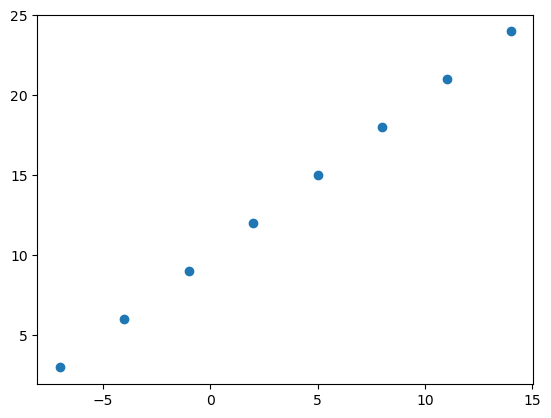

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

Before we do any modelling, can you calculate the pattern between X and y?

For example, say I asked you, based on this data what the y value would be if X was 17.0?

Or how about if X was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

So our input will be X and our output will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [5]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

Huh?

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [6]:
# Let's take a look at the single examples invidually
X[0], y[0]

(-7.0, 3.0)

In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use 1 X value to predict 1 y value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: making sure your input and outputs are in the correct shape.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

**Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).**

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [7]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

Metal device set to: Apple M1


2022-12-06 00:33:15.183957: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 00:33:15.184326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

2022-12-06 00:39:46.741527: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-06 00:39:46.741743: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-12-06 00:39:47.031402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 16.4449 - mae: 16.4449
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 16.1637 - mae: 16.1637
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 15.8824 - mae: 15.8824
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 15.6012 - mae: 15.6012
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 15.3199 - mae: 15.3199


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

What do you think the outcome should be if we passed our model an X value of 17.0?

In [12]:
# Make a prediction with the model
model.predict([17.0])

2022-12-06 00:41:11.568439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-7.4645805]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

🤔 Question: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, keras comes after tf (e.g. tf.keras.layers.Dense())?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

## Improving a model

#### How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model**  - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 92ms/step - loss: 16.4449 - mae: 16.4449
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 16.1637 - mae: 16.1637
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 15.8824 - mae: 15.8824
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 15.6012 - mae: 15.6012
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 15.3199 - mae: 15.3199
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 15.0387 - mae: 15.0387
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 14.8158 - mae: 14.8158
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 14.6833 - mae: 14.6833
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 14.5508 - mae: 14.5508
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 14.4183 - mae: 14.4183
Epoch 11/100
1/1 [==============================] - 0s 3ms

2022-12-06 00:47:12.039163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 29/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9008 - mae: 11.9008
Epoch 30/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7683 - mae: 11.7683
Epoch 31/100
1/1 [==============================] - 0s 3ms/step - loss: 11.6358 - mae: 11.6358
Epoch 32/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5033 - mae: 11.5033
Epoch 33/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3708 - mae: 11.3708
Epoch 34/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2383 - mae: 11.2383
Epoch 35/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1058 - mae: 11.1058
Epoch 36/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9733 - mae: 10.9733
Epoch 37/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8408 - mae: 10.8408
Epoch 38/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7083 - mae: 10.7083
Epoch 39/100
1/1 [==============================] 

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [14]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

2022-12-06 00:49:10.884021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[29.392914]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


2022-12-06 10:07:42.612748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 962ms/step - loss: 13.3668 - mae: 13.3668
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8411 - mae: 12.8411
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3333 - mae: 12.3333
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8177 - mae: 11.8177
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2881 - mae: 11.2881
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7429 - mae: 10.7429
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1783 - mae: 10.1783
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.5947 - mae: 9.5947
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9764 - mae: 8.9764
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3184 - mae: 8.3184
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6

1/1 [==============================] - 0s 4ms/step - loss: 3.7555 - mae: 3.7555
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6952 - mae: 3.6952
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7286 - mae: 3.7286
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7041 - mae: 3.7041
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7183 - mae: 3.7183
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6798 - mae: 3.6798
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7280 - mae: 3.7280
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6646 - mae: 3.6646
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7239 - mae: 3.7239
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6735 - ma

In [17]:
model.predict([17.0])

2022-12-06 10:09:15.240491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[32.413616]], dtype=float32)

this shows overfitting of the data as the previous model actually predicted better. 

Now we've trained a model, how could we evaluate it?

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

**Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...**

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

**Visualize, visualize, visualize**

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

**Let's start by visualizing the model.**

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the dataset (adhering to the same pattern as before)
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

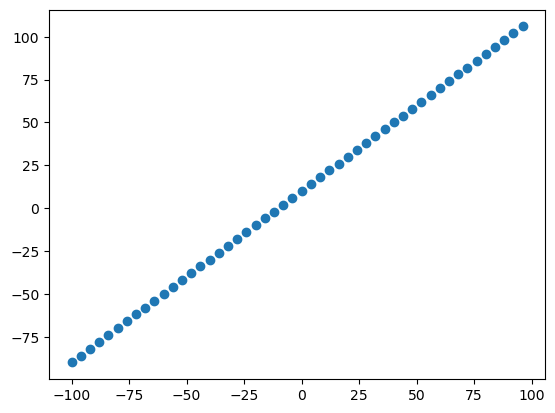

In [21]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [22]:
# Check how many samples we have
len(X)

50

In [23]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)